## Different Graph ML problems:

* **Node Level**: Given the graph $G=(V, E)$, the goal is to classify each vertex $v\in V$, into the right class.  In this setting, the dataset includes $G$ and a list of pairs, $<v_i, y_i>$, where $v_i$ is a node of graph $G$ and $y_i$ is the class to which the node belongs.

* **Edge Level**: Given the graph $G=(V, E)$, the goal is to classify each edge, $e \in E$, into the right class. The dataset contains the pair of $<e_i, y_i>$, where $e_i$ is an edge of graph $G$ and $y_i$ is the class to which it belongs. **Link prediction** is a task at this level. 

* **Graph Level**: Given the graph $G=(V, E)$, the goal is to classify each Graph. The dataset $<G_i, y_i>$, where $y_i$ is the class of the graph.

Features: It can be various graph properties at node/edge/graph level or network embeddings (representation learning). 

## Representation Learning
Learning a mapping function, $f:G \to \mathbb{R}^n$, from a discrete to a continuous domain. 

The function $f$ will be capable of performing a low-dimensional vector representation such that the properties (local and global) of graph $G$ are preserved. 

Since the machine learning problems have different granularity the representation function $f$ reflect that:
1. Node Embeddings: The representation function $f$ is used to learn vectorial representation of the nodes ($f:V \to \mathbb{R}^n$).
2. Edge Embeddings: The representaiton function $f$ is used to learn vectorial representation of the edges ($f:E \to \mathbb{R}^n$).

Another point-of-view is the representation in the eucledian space. Similar structures will have smaller eucledian distance and dissimilar structures will have a large Eucledian distance.

In [1]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

/opt/homebrew/Caskroom/miniforge/base/envs/graph_ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# !pip install pip-tools

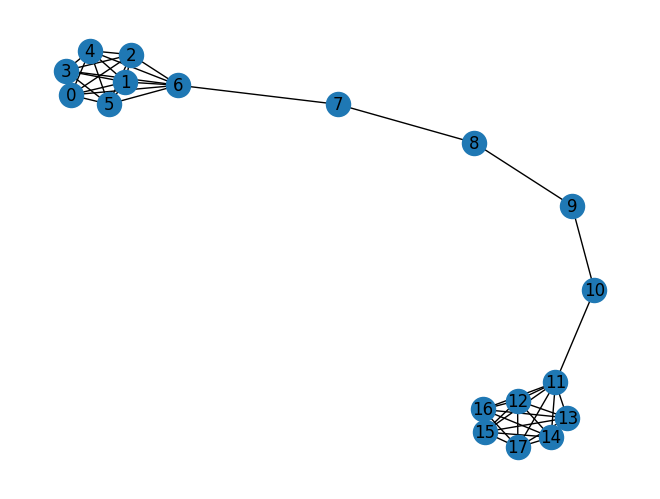

In [3]:
G = nx.barbell_graph(m1=7, m2=4)
nx.draw(G, with_labels=True)

### Observation
The characterstics of the original graph is preseved in 2-dimensions, hence the working of the embeddings.

### Edge embeddings
HadamardEmbedder algorithm is applied to the result of the Node2Vec algorithm (keyed_vectors=model.wv) used in order to map each edge of the graph in a vector of two dimensions. 


In [5]:
import random
n_graphs = 20

def generate_random():
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0,1)
    return nx.watts_strogatz_graph(n, k, p)

Gs = [generate_random() for _ in range(n_graphs)]

## Graph Embeddings

Every Graph/Edge/Node embedding method can be described by two fundamental components i.e. Encoder and decoder. The encoder maps the the input in the embedding space and the decoder decodes structural information about the graph from the learned embedding.

**INTUITION**: If we are able to encode a graph such that the decoder is able to retrieve all the necessary information then the embedding must contain a compressed version of this information that can be utilised in the downstream ML tasks.

**E.G**:
It is possible to implement the decoder such that, given the embedding representing two nodes 

i.e. $z_i = ENC(V_i)$ and $z_j = ENC(V_j)$, $DEC(z_i, z_j) = 1$, if in a graph an edge connecting these two nodes exist.


## Types of graph embedding algorithms
1. **Shallow Embedding Methods:** These methods are able to learn the representation and only encode (return embedding values) for the learned input data. It is not possible to encode unseen data using this method.
2. **Graph Autoencoding Methods:** They not only learn how to map graph inputs to vectors but also a general mapping function, $f(G)$ capable of generating embedding vector for unseen instances. 
3. **Neighborhood Aggregation Methods:** Used to extract embeddings at the graph level, where nodes are labelled with some properties. They also learn a general mapping function $f(G)$, capable of generating the embedding vector for unseen instances. While developing the embedding space node properties having the external information is considered. 

### Graph Regularization Methods
These methods of embedding are slightly different. The graph is not used as the input. The objective is to learn from a set of features by exploiting their "interaction" to regularize the process. 
The main idea is based on the assumption that nearby nodes in the graph are likely to have the same labels. The loss function is designed to constrain the labels to be consistent with the graph structure.


```
                            Shallow Embedding Methods    ----- (Supervised/Unsupervised)
                         /
Graph Embedding Methods --- Autoencoding Methods         ----- (Unsupervised)
                         \
                            Graph Regularization Methods -----    (Semi-Supervised/Supervised)
```                            

The graph models are trained with a loss functions which can be generalized in two ways:
1. Minimize the difference between prediction and the target.
2. Evaluation of similarity between the input graph and the one reconstructed after the ENC+DEC steps.

Formally, we have:

$Loss = \alpha L_{sup}(y, \hat{y}) + L_{rec}(G, \hat{G})$

$L_{sup}$: It is the loss in the supervised settings. 

$L_{rec}(G, \hat{G})$: It is the loss function that represents reconstruction error between the input graph (G) and the graph obtained after the ENC+DEC process $(\hat{G})$.

For unsupervised setting $\alpha=0$ and only the reconstruction loss is used.

# Unsupervised Graph Learning

- Graphs are not defined in a Eucledian space. (i.e. defining two nodes are close to each other, doesn't really mean much outside Eucleadian space).
- Unsupervised embeddings use those models that make use of only information in the adjacency matrix and the node features without any knowledge of the downstream tasks. 
- Learned representations are optiized so that it can be used to reconstruct pair-wise node similarity. The learned representation can encode latent relationships among nodes or graphs, allowing us to discover hidden and 
complex novel patterns.

<img src="./note_imgs/unsupervised_alg_hie.png" alt="Girl in a jacket" width="500" height="250">

## Matrix Factorization Methods

In the matrix decomposition method we take $W$ as the input data where $W \in \mathbb{R}^{m \times n}$ and decomposes it into $W \approx V \times H$ with $V \in \mathbb{R}^{m \times d}$ and $H \in \mathbb{R}^{d \times n}$ called the source and the abundance matrix respectively. V and H are the matrices learnt by minimising a loss function. Here $d$ is the dimension of the embedding space. 

All the unsupervised matrix embedding algorithms based on the decomposition method work in a similar way. The main difference between each of themis the choice of loss function. Different loss function allows for creation of embedding space focussing of different learnable properties. Matrix decomposition methods for graph embeddings:


### Graph Factorization (GF)
The GF algorithm is used for node embedding of a given graph. Formally for the graph $G=(V, E)$ with the adjacency matrix $A = \mathbb{R}^{|V| \times |V|}$, the loss function $L$ for matrix factorization is calculated as follows:

$$L = \frac{1}{2} \sum_{(i,j)\in E} (A_{i,j} - Y_{i,:}Y_{j,:}^{T})^2 + \frac{\lambda}{2} \sum_{i} ||Y_{i,:}||^2$$

where:

$(i, j) \in E$: represents one of the edges in $G$

$Y \in \mathbb{R}^{|V| \times d}$: matrix containing $d$ dimensional embeddings.

$\lambda$: is the regularization term

The embedding formulation performs a strong symmetric factorization (everything is squared and direction insensitive). Therefore its mostly suitable for undirected graph problems.

### Higher-order proximity preserved embedding (HOPE)

- **First-order proximity:** For a graph $G=(V, E)$, where the edges have a weight $W_{i,j}$ for each vertex pair $(v_i, v_j)$ the first-order proximity equal to $w_{ij}$ if the edge $(v_i, v_j) \in E$.

- **Second- and high-order proximity:** In second order proximity for each vertex pair $(v_i, v_j)$ has a two-step transition from $v_i$ to $v_j$. And similarly higher order proximity can be viewed as a k-step $(k \ge 3)$ transition from $v_i$ to $v_j$.

Given a graph $G=(V, E)$ for which the embedding has to be computed, let the adjacency matrix be $A \in \mathbb{R}^{|V| \times |V|}$. The loss function for the embedding is:
$$L = ||S - Y_s \times Y_t^T||_F^2$$

In the preceeding equation $S \in \mathbb{R}^{|V| \times |V|}$ is a similarity matrix generated from the graph $G$

$Y_s = \mathbb{R}^{|V| \times d}$: d-dimensional source embedding

$Y_t \in \mathbb{R}^{|V| \times d}$ d-dimensional target embedding

Hope uses two matrices in order to capture asymmetric proximity in directed networks where the direction from a source node and a target node is present. 
The final embedding is obtained by simply the concatenation of $Y_s$ and $Y_t$. Hence the final embedding dimension generated by HOPE will have $2 \times d$ dimensions.

The similarity matrix $S$ is obtained from the original graph $G$. The goal of $S$ is to obtain a high-order proximity function. Formally, it's calculated as $S= M_g \cdot M_l$, where $M_g$ and $M_l$ are both polynomial of matrices. 

$M_g$ and $M_l$ can be computed in different ways:
1. **Adamic-Adar (AA)**: In this formulation $M_g=I$, $M_l = A \cdot D \cdot A$ where $D$ is diagonal matric computed from the adjacency matrix $A$ as $D_{ij} = \frac{1}{\sum A_{ij} + A_{ji}}$
2. **Katz Index**
3. **Rooted Page Rank (RPR)**
4. **Common Neighbors (CN)**


In [6]:
import networkx as nx
from gem.embedding.gf import GraphFactorization

In [7]:
G = nx.barbell_graph(m1=6, m2=4)
gf = GraphFactorization(d=8, data_set=None, max_iter=10000, eta=1*19**-4, regu=1.0)
gf.learn_embedding(G)
embeddings = gf.get_embedding()

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


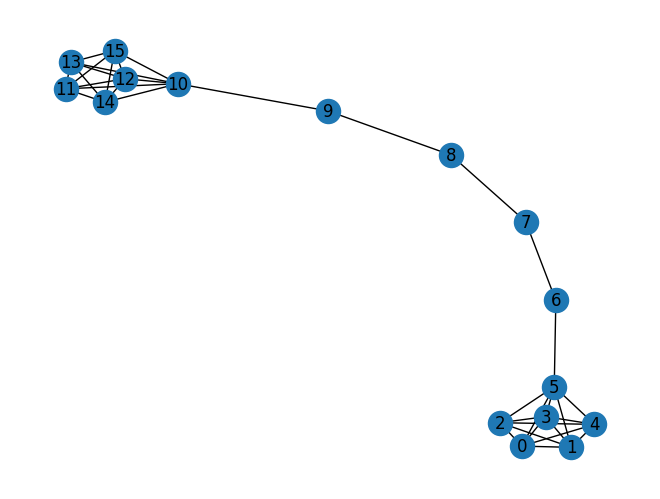

In [8]:
nx.draw(G, with_labels=True)

In [9]:
pca_embeds = PCA(n_components=2)
pca_comps = pca_embeds.fit_transform(embeddings)

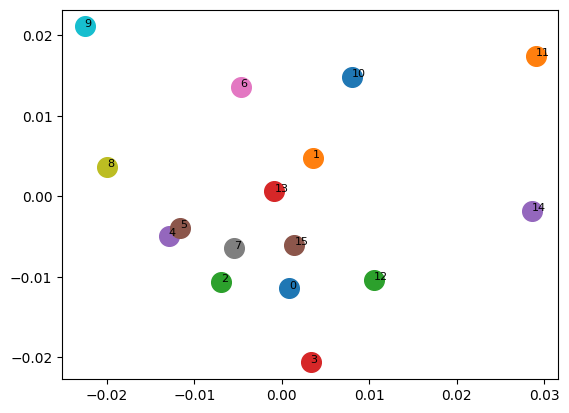

In [10]:
fig, ax = plt.subplots()
for x in G.nodes():
    ax.scatter(pca_comps[x][0], pca_comps[x][1], s=200)
    ax.annotate(str(x), (pca_comps[x][0], pca_comps[x][1]), fontsize=8)

In [11]:
from gem.embedding.hope import HOPE
gfh = HOPE(d=8, beta=0.01)
gfh.learn_embedding(G)
embedding_h = gfh.get_embedding()

SVD error (low rank): 0.035146


In [12]:
pca_embeds_h = PCA(n_components=2)
pca_comps_h = pca_embeds_h.fit_transform(embedding_h)

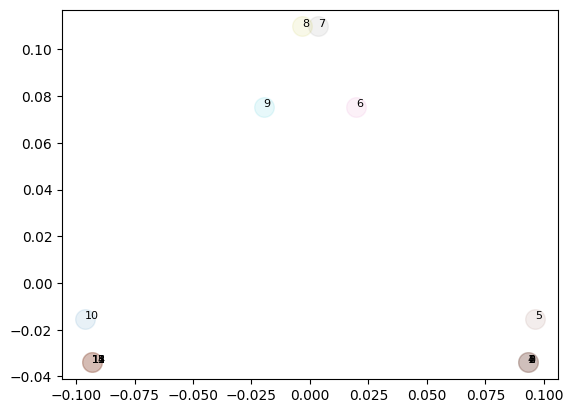

In [13]:
fig, ax = plt.subplots()
for x in G.nodes():
    
    ax.scatter(pca_comps_h[x][0], pca_comps_h[x][1], s=200, alpha=0.1)
    ax.annotate(str(x), (pca_comps_h[x][0], pca_comps_h[x][1]), fontsize=8)

## BFS
Breadth First Search starts at some arbitrary node of a graph and then explores the neighbour nodes first, before moving to the next level neighbours. 

## DFS (Depth First Search)
A Depth First Search plunges depth first into a graph without regards for which edge it takes next until it cannot go any further at which point it backtracks and continues.

## Observation
We observe that HOPE embeddings are able to discriminate different components of the barbell graph as compared to the Graph Factorisation methods. They provide a better separation from the spatial graph.


### Graph representation with global strcture information
The Graph representation with global structure information allows us to preserve high-order proximity without forcing its embeddings to have symmetric properties. It works in ways similar to HOPE

## DEEP WALK

### Random Walk
In a graph $G$, let $v_i$ be the starting point. We select a node $v_i$ and move towards it. From this point, we randomly select another point and move towards it. This process is repeated $t$ times.

**Social Representations**: These are the latent features of the vertices that capture neighborhood similarity and community membership.

Deep Walk learns social representations of a graph's vertices by modelling a stream of short random walks. It takes a graph as input and produces a latent representation as an output.

**Parallels with language modelling**: The graph is explored using a stream of short random walks. These random walks can be thought of as short sentences and phrases in a special language. The objective in language modelling is to predict the next word that gas the highest probability given the previous words in the sequence i.e.

Given the sequence of words $W_1^{n} = (w_0, w_1, ..., w_n)$ where $w_i \in \mathcal{V}$ ($\mathcal{V}$ is the vocabulary) and we want to maximize the $P_r(w_i | (w_1, w_2, ..., w_{i-1}))$

Analogously, in the graph we estimate the likelihood of observing vertex $\nu_i$ given all the vertex visited so far in the random walk:

$P_r(\nu_i | (\nu_1, \nu_2, ..., \nu_{i-1}))$

Our goal is also to learn a latent representation not just the probability distribution we saw above, so we introduce a mapping function $\Phi: \nu \in V \rightarrow \mathbb{R}^{|V| \times d}$. This modifies the problem to the estimation of:

$Pr(v_i | (\Phi(v_1), \Phi(v_2), ..., \Phi(v_{i-1})))$

They also apply the optimizations meant for language modelling to deep walk:
1. Instead of using the context to predict the missing word they predict the context with the word.
2. Context includes words from both the left and the right side of the word.
3. The ordering is not considered.

It further modifies the problem to :

$minimize_{\Phi} -log Pr(\{\nu_{i-w}\, ..., \nu_{i+w}\}  \backslash \nu_i | \Phi(\nu_i))$

This method generates representation of social networks that are low-dimensional, and exist in continuous vector space.



In [14]:
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

In [15]:
dw_embedder = DeepWalk(dimensions=2, epochs=1000)
dw_embedder.fit(G)
dw_embeddings = dw_embedder.get_embedding()

/opt/homebrew/Caskroom/miniforge/base/envs/graph_ml/lib/python3.9/site-packages/karateclub/estimator.py:66: UserWarning: Please do be advised that the graph you have provided does not contain (some) edges in the main diagonal, for instance the self-loop constitued of (0, 0). These selfloops are necessary to ensure that the graph is traversable, and for this reason we create a copy of the graph and add therein the missing edges. Since we are creating a copy, this will immediately duplicate the memory requirements. To avoid this double allocation, you can provide the graph with the selfloops.
  warnings.warn(


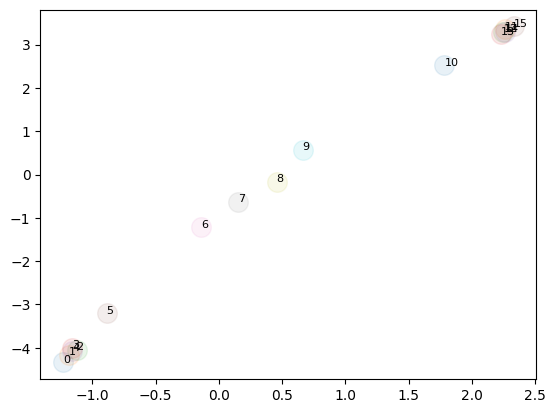

In [16]:
fig, ax = plt.subplots()
for x in G.nodes():
    
    ax.scatter(dw_embeddings[x][0], dw_embeddings[x][1], s=200, alpha=0.1)
    ax.annotate(str(x), (dw_embeddings[x][0], dw_embeddings[x][1]), fontsize=8)

In this example we see that deep walk embeddings are able to learn the features in smaller embeddings.


## Node2Vec
It can be thought as an extension of the Deepwalk algorithm, the difference being the way random walk is generated. **DeepWalk** generates random walks without any bias, whereas Node2Vec combines graph exploration by merging **Breadth-First Search (BFS)** and **Depth-First Search**. The degree of bias for BFS and DFS is regularized using two parameters, *p*(the probability of a random walk getting back to the previous node) and *q*(probability that a random walk can pass through a previouly unseen part of the graph).

Thus **Node2Vec** preserves both the local and the global community structure of the node.

Important parameters:

* `num_walks`: The number of random walks to generate for each node.
* `walk_length`: The length of the generated random walks.
* `p, q`

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 338.64it/s]


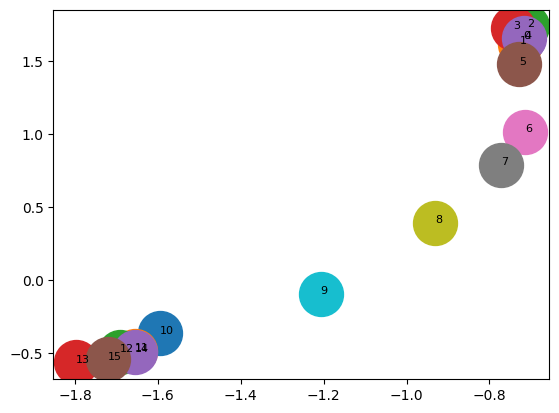

In [17]:
node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)

fig, ax = plt.subplots()
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0], v[1], s=1000)
    ax.annotate(str(x), (v[0], v[1]), fontsize=8)

## Edge2Vec
Generates embedding space on the **edges** instead of the nodes. This algorithm is a simple side effect of the embedding generated by using Node2Vec, primarily utilizing node embeddings of the two adjacent nodes to perform some basic mathematical operations in order to extract the embedding the edge connecting them. 


## Graph2Vec


